In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from nlp_id.postag import PosTag
import gensim
import time
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models
from wordcloud import WordCloud

In [2]:
# Import the twitter the cleaned file 'twittercleaned.csv'
df = pd.read_csv('assets/data_folder/twittercleaned.csv')

In [3]:
# Create a sentiment analyzer object
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment scores for a single sentence
def get_sentiment_scores(sentence):
    scores = analyzer.polarity_scores(sentence)
    return scores

# Apply the sentiment analysis function to the entire column
df['Sentiment_Score'] = df['Text_Translated'].apply(get_sentiment_scores)

# Extract the individual sentiment scores as separate columns
df['Negative_Score'] = df['Sentiment_Score'].apply(lambda x: x['neg'])
df['Neutral_Score'] = df['Sentiment_Score'].apply(lambda x: x['neu'])
df['Positive_Score'] = df['Sentiment_Score'].apply(lambda x: x['pos'])
df['Compound_Score'] = df['Sentiment_Score'].apply(lambda x: x['compound'])

In [4]:
df

,Datetime,Text,Keyword,Text_Processed,Language,Text_Translated,Sentiment_Score,Negative_Score,Neutral_Score,Positive_Score,Compound_Score
0,2015-12-28 18:00:42+00:00,Mencari perbandingan RUU KUHP &amp; KUHP!,RUU KUHP,cari banding rancangan undang undang kuhp amp ...,id,search for appeals of the draft law on the Cri...,"{'neg': 0.382, 'neu': 0.618, 'pos': 0.0, 'comp...",0.382,0.618,0.000,-0.7783
1,2015-12-23 02:03:39+00:00,Stadium General: Perkembangan dan Masa Depan P...,RUU KUHP,stadium general kembang susun rancangan undang...,id,General Kembang Stadium drafts the Criminal Co...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.167,0.833,0.000,-0.5267
2,2015-12-20 05:04:17+00:00,Rechtelijk Pardon di #RUUKUHP tidak tepat dite...,RUU KUHP,rechtelijk pardon terjemah maaf adil terjemah ...,id,"rechtelijk pardon translation of sorry, fair, ...","{'neg': 0.084, 'neu': 0.323, 'pos': 0.594, 'co...",0.084,0.323,0.594,0.7845
3,2015-12-19 10:05:37+00:00,Kapan RUU KUHP kita di sahkan????,RUU KUHP,rancangan undang undang kuhp sahkan,id,the draft criminal code law is ratified,"{'neg': 0.34, 'neu': 0.5, 'pos': 0.16, 'compou...",0.340,0.500,0.160,-0.4215
4,2015-12-19 09:48:27+00:00,"@SoundOfYogi udah ga ada mit, dicabut mk, tapi...",RUU KUHP,sudah tidak mit pergi mk rancangan undang unda...,id,I can't go anymore now that the draft Criminal...,"{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'comp...",0.236,0.764,0.000,-0.5267
...,...,...,...,...,...,...,...,...,...,...,...
6413,2023-02-13 08:26:22+00:00,@ediwanqu Betul...jangan sampai menunggu revis...,revisi RKUHP,tunggu revisi undang undang rkuhp laku 3 lagi,id,Wait for the revision of the RKUHP law to take...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
6414,2023-02-06 17:45:13+00:00,Yang jelas akan melebihi apa yang terjadi dala...,revisi RKUHP,aksi tolak rkuhp 2019 revisi undang undang kom...,id,"action to reject the 2019 RKUHP, revision of t...","{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",0.119,0.881,0.000,-0.4019
6415,2023-01-29 03:00:30+00:00,Revisi RKUHP tidak mudah tapi tetap kita dukun...,revisi RKUHP,revisi rkuhp mudah dukung rkuhp adil rfbrsltbmo,id,Easy RKUHP revision supports fair RKUHP RFBRSL...,"{'neg': 0.0, 'neu': 0.342, 'pos': 0.658, 'comp...",0.000,0.342,0.658,0.7717
6416,2023-01-13 06:38:09+00:00,KUHP Baru Sangat Baik.. Revisi RKUHP tidak mud...,revisi RKUHP,kuhp revisi rkuhp mudah dukung,id,The revised Criminal Code is easy to support,"{'neg': 0.243, 'neu': 0.357, 'pos': 0.4, 'comp...",0.243,0.357,0.400,0.2960


In [5]:
# Define a function to give the value of the sentiments based off the score
def interpret_sentiment(compound_score):
    if compound_score < 0.0:
        return 'Negative'
    elif compound_score == 0.0:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function
df['Sentiment'] = df['Compound_Score'].apply(interpret_sentiment)
# Drop any neutral sentiments
df = df[df['Sentiment'] != 'Neutral']
df = df.reset_index(drop=True)

In [6]:
# Create a pos tagger object
postagger = PosTag() 

# Define a function for pos tagging
def pos_tagging(tokens):
    return postagger.get_pos_tag(tokens)

# Apply the function to the 'Text_Processed' (The pos tagger automatically tokenizes the text first)
df['POS_Tags'] = df['Text_Processed'].apply(pos_tagging)

C:\Users\Aspire E5-475G\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DictVectorizer from version 0.22 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Aspire E5-475G\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Aspire E5-475G\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomFor

In [7]:
saring=[]

# Filter out any pos tags beside 'NN' and 'VB'
for i in df['POS_Tags'] :
    sar=[word[0] for word in i if word[1] in ['NN', 'VB']]
    saring.append(sar)

# Insert a column containing the filtered pos tags
df['final'] = saring

In [8]:
# Delete any empty values in 'final'
df = df[df['final'].map(lambda d: len(d)) > 0]

In [9]:
# Convert the 'final' column of the DataFrame to a list of texts
text_data = df['final'].tolist()

# Create a Gensim dictionary from the list of texts
dictionary = gensim.corpora.Dictionary(text_data)

# Convert the list of texts into a bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in text_data]
# Create a TF-IDF model from the corpus
tfidf = gensim.models.TfidfModel(corpus)
# Apply the TF-IDF model to the corpus to create a new corpus with TF-IDF weights
corpus_tfidf = tfidf[corpus]

In [10]:
# Start a timer to measure the duration of the following code
start_time = time.time()
# Print a message indicating the start of the "to_sql" process
print("to_sql duration: {} seconds".format(time.time() - start_time))

coherence = []

# Loop through a range of values for k (number of topics)
for k in range(2,10):
    print('Iteration: '+str(k))
    # Initialize an LDA model with the specified number of topics
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus_tfidf, num_topics=k, id2word = dictionary,
                    chunksize = 100,random_state=100, per_word_topics=True)
    # Calculate the coherence value for the current number of topics
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=text_data, 
                                                     dictionary=dictionary, coherence='c_v')
    # Print a message indicating the duration of the "to_sql" process and append the coherence value to the list
    print("to_sql duration: {} seconds".format(time.time() - start_time))
    coherence.append((k,cm.get_coherence()))

to_sql duration: 0.0009987354278564453 seconds
Iteration: 2
to_sql duration: 4.668518781661987 seconds
Iteration: 3
to_sql duration: 14.069885969161987 seconds
Iteration: 4
to_sql duration: 21.943992137908936 seconds
Iteration: 5
to_sql duration: 29.9829683303833 seconds
Iteration: 6
to_sql duration: 38.19799542427063 seconds
Iteration: 7
to_sql duration: 46.38991856575012 seconds
Iteration: 8
to_sql duration: 54.98804068565369 seconds
Iteration: 9
to_sql duration: 63.90053033828735 seconds


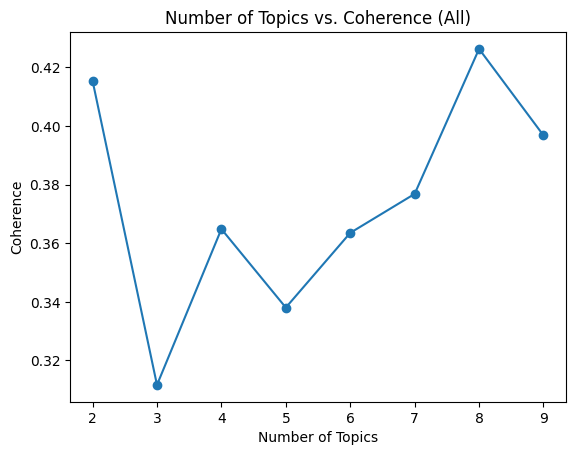

In [11]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Number of Topics vs. Coherence (All)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [14]:
pyLDAvis.enable_notebook()

finalLdamodel = Lda(corpus_tfidf, num_topics=4, id2word = dictionary,
                    chunksize = 100,random_state=100, per_word_topics=True)

vis = pyLDAvis.gensim_models.prepare(finalLdamodel, corpus_tfidf
                                     , dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.210564  0.007545       1        1  37.344030
2      0.055082 -0.186821       2        1  24.384187
3      0.044164  0.120285       3        1  19.775015
0      0.111318  0.058991       4        1  18.496769, topic_info=               Term        Freq       Total Category  logprob  loglift
33           komisi  114.000000  114.000000  Default  30.0000  30.0000
36    pemberantasan  109.000000  109.000000  Default  29.0000  29.0000
534           kitab  234.000000  234.000000  Default  28.0000  28.0000
173          revisi  188.000000  188.000000  Default  27.0000  27.0000
34          korupsi  121.000000  121.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
1803          bunyi   24.847128   29.695080   Topic4  -4.8723   1.5093
550         rencana   11.979394   13.133523   Topic4  -5.6018   1.5956
107           agama   10.935780   12.668418   Topic4  -5.6930   1.5405
1641          islam   11.804999   16.373091   Topic4  -5.6165   1.3605
9             hukum   12.924777  165.143719   Topic4  -5.5259  -0.8601

[205 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
843       3  0.996895    acara
124       4  0.977520     adat
107       1  0.078936    agama
107       2  0.078936    agama
107       4  0.868301    agama
...     ...       ...      ...
3067      4  0.949471      van
227       3  0.989346    warga
882       2  0.955682   wenang
3068      4  0.946634  wetboek
661       2  0.926074  yasonna

[231 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

In [13]:
def format_topics_sentences(ldamodel=None, corpus=corpus_tfidf, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=finalLdamodel, corpus=corpus_tfidf, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

In [ ]:
df_dominant_topic['pre_Text'] = df['Text']

In [ ]:
df_dominant_topic

In [ ]:
df_dominant_topic[df_dominant_topic['Dominant_Topic'] == 3.0].sample(10)

In [ ]:
from collections import Counter
import matplotlib.colors as mcolors
topics = finalLdamodel.show_topics(formatted=False)
data_flat = [w for w_list in text_data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_counter = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_counter.loc[df_counter.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_counter.loc[df_counter.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.025); ax.set_ylim(0, 600)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df_counter.loc[df_counter.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.savefig('word_count_importance_topic_keywords.png')
plt.show()

In [ ]:
# Combine tokenized words into a single string
df['Words'] = df['final'].apply(lambda x: ' '.join(x))

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# filter dataframe by electability value and sentiment
electable_words = df[df['Electability'] == 1]['Words']
unelectable_words = df[df['Electability'] == 0]['Words']
electable_pos_words = ' '.join(electable_words[df['Sentiment'] == 'Positive'])
electable_neg_words = ' '.join(electable_words[df['Sentiment'] == 'Negative'])
unelectable_pos_words = ' '.join(unelectable_words[df['Sentiment'] == 'Positive'])
unelectable_neg_words = ' '.join(unelectable_words[df['Sentiment'] == 'Negative'])

# create wordcloud for electable positive words
electable_pos_cloud = WordCloud(background_color="white").generate(electable_pos_words)
plt.imshow(electable_pos_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Electable Positive Words")
plt.savefig("electable_pos_cloud.png", bbox_inches='tight', dpi=300)
plt.show()

# create wordcloud for electable negative words
electable_neg_cloud = WordCloud(background_color="white").generate(electable_neg_words)
plt.imshow(electable_neg_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Electable Negative Words")
plt.savefig("electable_neg_cloud.png", bbox_inches='tight', dpi=300)
plt.show()

# create wordcloud for unelectable positive words
unelectable_pos_cloud = WordCloud(background_color="white").generate(unelectable_pos_words)
plt.imshow(unelectable_pos_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unelectable Positive Words")
plt.savefig("unelectable_pos_cloud.png", bbox_inches='tight', dpi=300)
plt.show()

# create wordcloud for unelectable negative words
unelectable_neg_cloud = WordCloud(background_color="white").generate(unelectable_neg_words)
plt.imshow(unelectable_neg_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unelectable Negative Words")
plt.savefig("unelectable_neg_cloud.png", bbox_inches='tight', dpi=300)
plt.show()
